<div class="alert alert-block alert-info alert">
Bu projede, inme vakası yaşayanlar hakkında bilgi içeren bir veri kümesi ile çalışacağız. Projemizin amacı, veri setinde yer alan bireylerin yaş, cinsiyet, hastalık geçmişi ve yaşam tarzı gibi faktörlere göre inme (stroke) riski taşıyıp taşımadığını analiz etmektir. 
(In this project, we will work with a dataset containing information about individuals who have experienced a stroke. The aim of our project is to analyze whether the individuals in the dataset are at risk of stroke based on factors such as age, gender, medical history, and lifestyle.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df0 = pd.read_csv('healthcare-dataset-stroke-data.csv') 
df = df0.copy()

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()  # Eksik değerler

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [7]:
df["bmi"].fillna(df["bmi"].median(), inplace = True) # Eksik değerleri medyan ile doldurduk.

In [8]:
df.duplicated().sum()   # DataFrame'de tamamen aynı olan (yinelenmiş) satır bulunmuyor.
                        # df.drop_duplicates() gibi bir işlem yapmaya gerek yok.

0

In [9]:
df.columns


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.rename(columns={'Residence_type': 'residence_type'}, inplace=True)  
 
# sütun ismi tutarsız olan tek sütun Residence_type, büyük harfle başlıyor, 
# bu yüzden küçük harfe çevirdik

In [11]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [12]:
df["gender"].value_counts() 

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [13]:
df = df[df["gender"] != "Other"].reset_index(drop=True) 

# "Other" cinsiyeti 1 adet olduğu için veri setinden çıkardık.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


In [15]:
df["age"] = df["age"].apply(lambda x: int(x) if x % 1 == 0 else round(x)) 

# Yaş sütunundaki ondalıklı sayıları en yakın tam sayıya yuvarladık.

In [16]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [17]:
df["work_type"] = df["work_type"].str.replace("-"," ").str.replace("_"," ").str.capitalize()  
df["work_type"].unique()

# work_type sütunundaki "-" ve "_" karakterlerini boşlukla değiştirdik.

array(['Private', 'Self employed', 'Govt job', 'Children', 'Never worked'],
      dtype=object)

In [18]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [19]:
df["smoking_status"] = df["smoking_status"].str.capitalize() 
df["smoking_status"].unique()

# smoking_status sütunundaki değerlerin ilk harfini büyük yaptık.

array(['Formerly smoked', 'Never smoked', 'Smokes', 'Unknown'],
      dtype=object)

In [20]:
print(df['gender'].unique())
print(df["ever_married"].unique())
print(df['work_type'].unique())
print(df['residence_type'].unique())
print(df['smoking_status'].unique())

['Male' 'Female']
['Yes' 'No']
['Private' 'Self employed' 'Govt job' 'Children' 'Never worked']
['Urban' 'Rural']
['Formerly smoked' 'Never smoked' 'Smokes' 'Unknown']


In [21]:
category_columns = ['gender','ever_married','work_type', 'residence_type', 'smoking_status']

In [22]:
df[category_columns] = df[category_columns].astype('category') # veri tiplerini kategori yaptık

In [23]:
df.info() # DataFrame'in son durumu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5109 non-null   int64   
 1   gender             5109 non-null   category
 2   age                5109 non-null   int64   
 3   hypertension       5109 non-null   int64   
 4   heart_disease      5109 non-null   int64   
 5   ever_married       5109 non-null   category
 6   work_type          5109 non-null   category
 7   residence_type     5109 non-null   category
 8   avg_glucose_level  5109 non-null   float64 
 9   bmi                5109 non-null   float64 
 10  smoking_status     5109 non-null   category
 11  stroke             5109 non-null   int64   
dtypes: category(5), float64(2), int64(5)
memory usage: 305.2 KB


<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Analysis Goal
</span>

<div class="alert alert-block alert-success">

### <span style=" color:red"> How does age influence stroke occurrence?
</span>

In [24]:

df.groupby('stroke')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4860.0,41.974897,22.293026,0.0,24.0,43.0,59.0,82.0
1,249.0,67.726908,12.734166,1.0,59.0,71.0,78.0,82.0


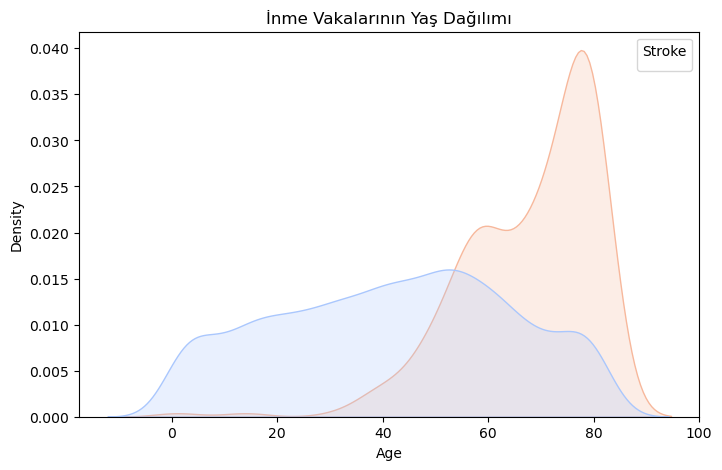

In [25]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='age', hue='stroke', common_norm=False, fill=True, palette='coolwarm')
plt.title('İnme Vakalarının Yaş Dağılımı')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Stroke')
plt.show()

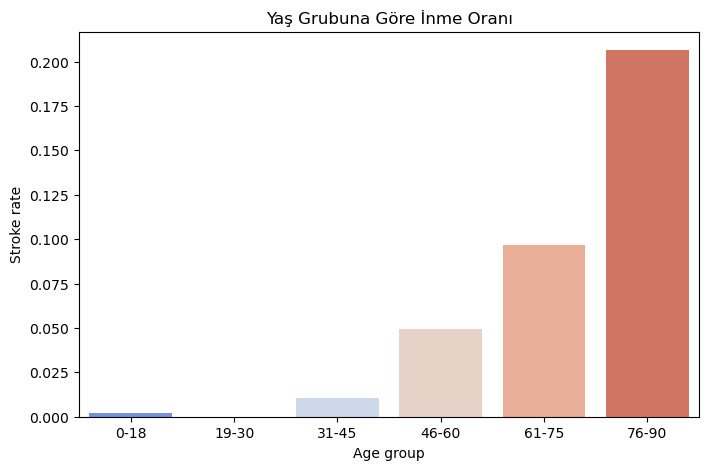

In [26]:
df['age_group'] = pd.cut(df['age'], bins=[0,18,30,45,60,75,90], 
                labels=['0-18','19-30','31-45','46-60','61-75','76-90'])

age_group_stroke = df.groupby('age_group')['stroke'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='age_group', y='stroke', data=age_group_stroke, palette='coolwarm')
plt.title('Yaş Grubuna Göre İnme Oranı')
plt.xlabel('Age group')
plt.ylabel('Stroke rate')
plt.show()
# 60 yaş altı bireylerde stroke oranı çok düşük
# Özellikle 70 yaş ve üzeri bireyler stroke açısından yüksek risk grubundadır.

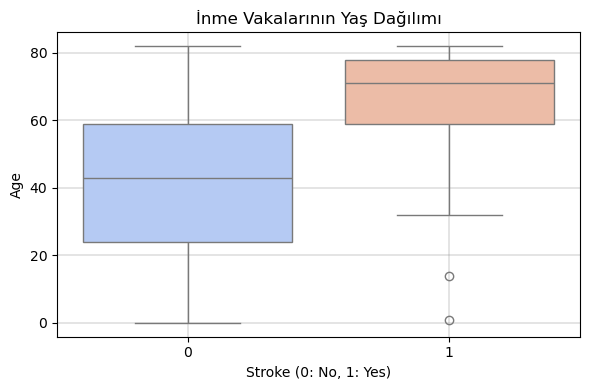

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x='stroke', y='age', data=df, palette='coolwarm')
plt.title('İnme Vakalarının Yaş Dağılımı')
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Age')
plt.grid(True, color='gray', linewidth=0.3)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Do body mass index (BMI) and glucose levels jointly or independently increase stroke risk?
</span>

In [28]:
df.groupby('stroke')['bmi'].mean()

stroke
0    28.800432
1    30.090361
Name: bmi, dtype: float64

In [29]:
# BMI kategorilerini oluşturmak için kod
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels)

print(df['bmi_category'].value_counts())

bmi_category
Obese          1920
Overweight     1610
Normal         1230
Underweight     349
Name: count, dtype: int64


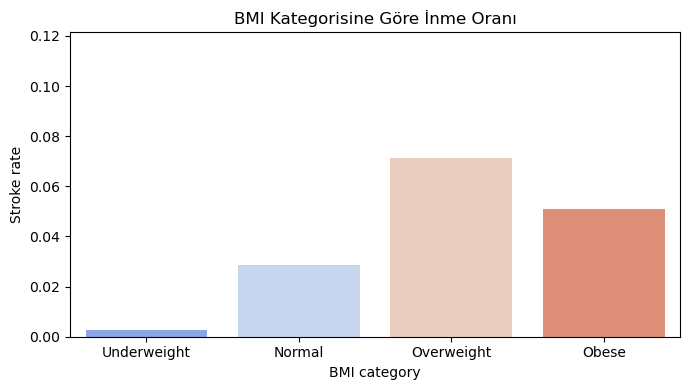

In [30]:
# Her BMI kategorisinde stroke oranını hesapla
bmi_stroke_rate = df.groupby('bmi_category')['stroke'].mean().reset_index()
bmi_stroke_rate = bmi_stroke_rate.sort_values('stroke', ascending=False).reset_index(drop=True)

plt.figure(figsize=(7,4))
sns.barplot(
    x='bmi_category',
    y='stroke',
    data=bmi_stroke_rate,
    palette='coolwarm'  
    )
plt.title('BMI Kategorisine Göre İnme Oranı')
plt.xlabel('BMI category')
plt.ylabel('Stroke rate')
plt.ylim(0, bmi_stroke_rate['stroke'].max() + 0.05)
plt.tight_layout()
plt.show()

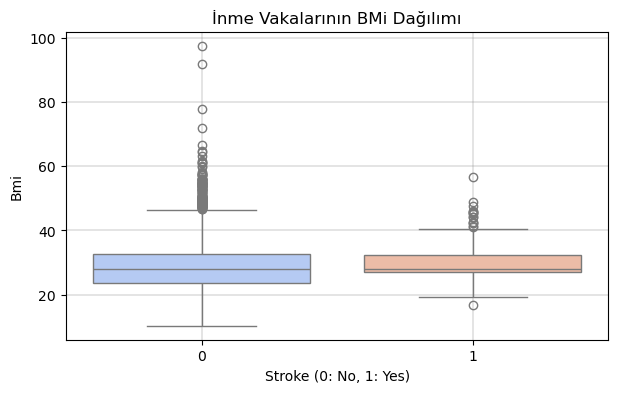

In [31]:
plt.figure(figsize=(7,4))
sns.boxplot(x='stroke', y='bmi', data=df, palette='coolwarm')
plt.title('İnme Vakalarının BMi Dağılımı')
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Bmi')
plt.grid(True, color='gray', linewidth=0.3)
plt.show()

In [32]:
# Glukoz kategorilerini oluştur
bins = [0, 99, 125, 1000]
labels = ['Normal', 'Prediabetes', 'Diabetes']
df['glucose_category'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels)

print(df['glucose_category'].value_counts())

glucose_category
Normal         3071
Prediabetes    1039
Diabetes        999
Name: count, dtype: int64


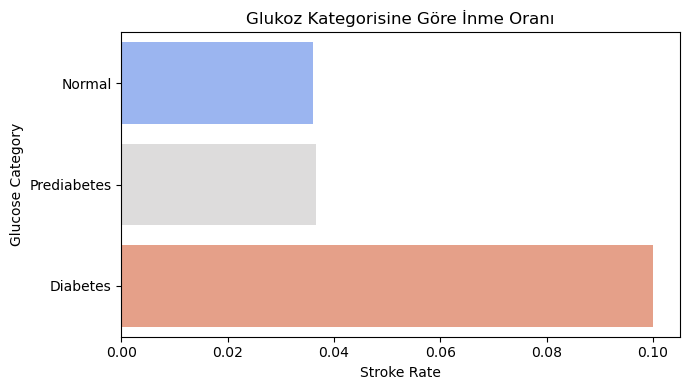

In [33]:
# Glukoz kategorisine göre inme oranı (stroke rate) kodu
glucose_stroke_rate = df.groupby('glucose_category')['stroke'].mean().reset_index()
glucose_stroke_rate = glucose_stroke_rate.sort_values('stroke', ascending=False).reset_index(drop=True)

plt.figure(figsize=(7,4))
sns.barplot(
    y='glucose_category',
    x='stroke',
    data=glucose_stroke_rate,
    palette='coolwarm',
    orient='h'
)
plt.title('Glukoz Kategorisine Göre İnme Oranı')
plt.xlabel('Stroke Rate')
plt.ylabel('Glucose Category')
plt.tight_layout()
plt.show()

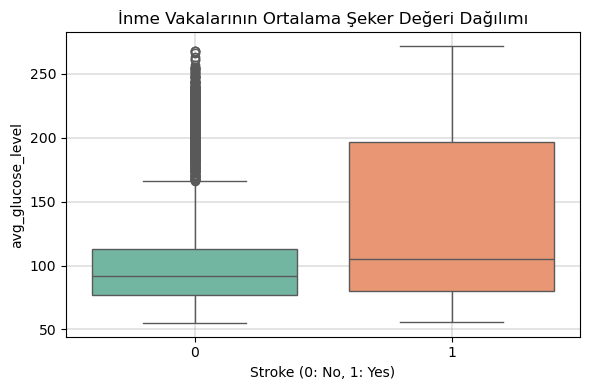

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='Set2')
plt.title('İnme Vakalarının Ortalama Şeker Değeri Dağılımı')
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('avg_glucose_level')
plt.grid(True, color='gray', linewidth=0.3)
plt.tight_layout()  
plt.show()

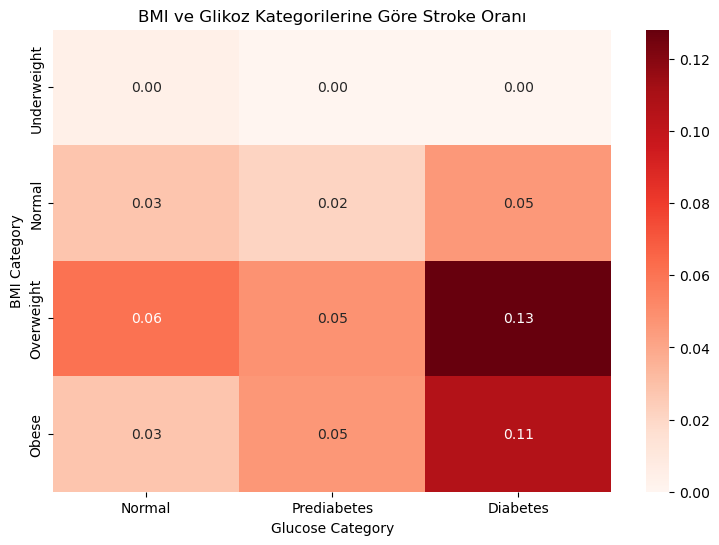

In [35]:
# BMI ve glikoz kategorilerini birlikte stroke oranına göre incele
pivot = pd.pivot_table(
    df, 
    values='stroke', 
    index='bmi_category', 
    columns='glucose_category', 
    aggfunc='mean'
)
plt.figure(figsize=(9,6))
sns.heatmap(pivot, annot=True, cmap='Reds', fmt=".2f")
plt.title('BMI ve Glikoz Kategorilerine Göre Stroke Oranı')
plt.xlabel('Glucose Category')
plt.ylabel('BMI Category')
plt.show()

Isı haritası (heatmap) analizine göre hem BMI kategorisi "Overweight" veya "Obese" olan hem de glikoz kategorisi "Diabetes" olan bireylerde stroke (inme) oranı diğer gruplara göre belirgin şekilde daha yüksek çıkmaktadır.(According to heatmap analysis, the stroke rate is significantly higher in individuals who are both in the “Overweight” or ‘Obese’ BMI category and in the “Diabetes” glucose category compared to other groups.)

<div class="alert alert-block alert-success">

### <span style=" color:red"> Can smoking increase the likelihood of stroke?
</span>

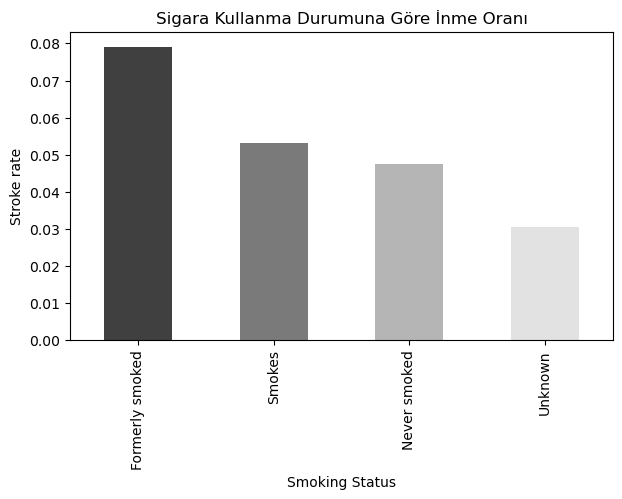

In [36]:
inme_oranlari = df.groupby('smoking_status')['stroke'].mean()

# Barları uzunluğa göre sıralayalım
sorted_inme = inme_oranlari.sort_values(ascending=False)
# Gri tonları (koyu en uzun bara)
palette = sns.color_palette("Greys", n_colors=len(sorted_inme))
palette = palette[::-1]  # Koyu renk en uzun bara gelsin

plt.figure(figsize=(7,4))
sorted_inme.plot(kind='bar', color=palette)
plt.title('Sigara Kullanma Durumuna Göre İnme Oranı')
plt.ylabel('Stroke rate')
plt.xlabel('Smoking Status')
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Do individuals with heart disease face a higher stroke risk?
</span>

heart_disease
0    0.041796
1    0.170290
Name: stroke, dtype: float64


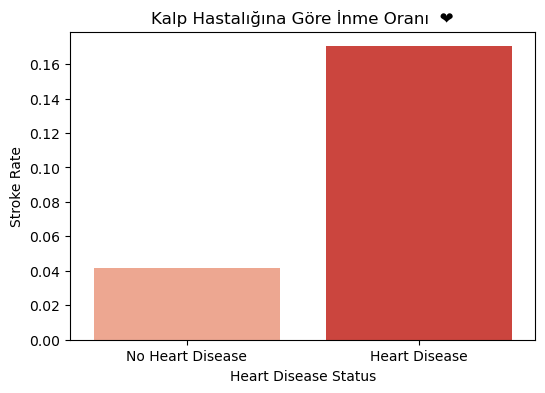

In [37]:
# Kalp hastalığı olan ve olmayanlarda inme oranı
inme_oranlari_kalp = df.groupby('heart_disease')['stroke'].mean()

print(inme_oranlari_kalp)

# Grafikle göster
plt.figure(figsize=(6,4))
sns.barplot(x=inme_oranlari_kalp.index, y=inme_oranlari_kalp.values, palette='Reds')
plt.title('Kalp Hastalığına Göre İnme Oranı  ❤️')
plt.xticks([0,1], ['No Heart Disease', 'Heart Disease'], rotation=0)
plt.ylabel('Stroke Rate')
plt.xlabel('Heart Disease Status')
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Does work-related stress contribute to hypertension and subsequently to strokes?
</span>

In [38]:
df['hypertension'] = df['hypertension'].astype(int) # gerekli olduğundan hipertansiyon sütunu int tipine dönüştürüldü.

work_type
Children         0.000000
Govt job         0.111111
Never worked     0.000000
Private          0.096101
Self employed    0.175824
Name: hypertension, dtype: float64


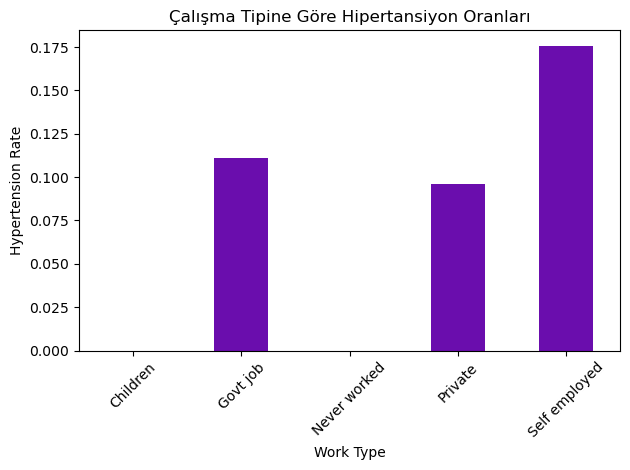

In [39]:
hipertansiyon_oranlari = df.groupby('work_type')['hypertension'].mean()

print(hipertansiyon_oranlari)

hipertansiyon_oranlari.plot(kind='bar', color='#6a0dad')
plt.title('Çalışma Tipine Göre Hipertansiyon Oranları')
plt.ylabel('Hypertension Rate')
plt.xlabel('Work Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

hypertension
0    0.039688
1    0.132530
Name: stroke, dtype: float64


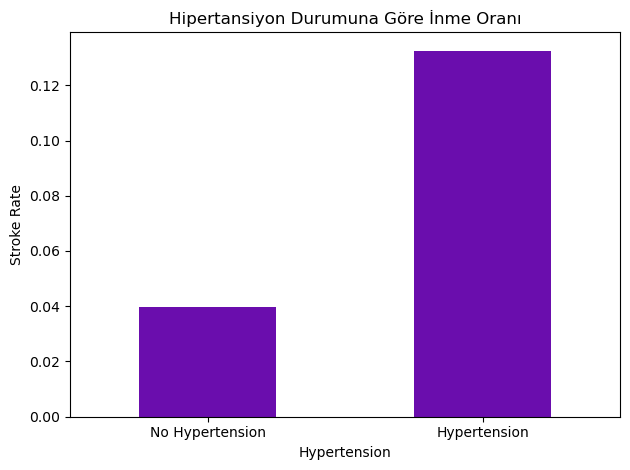

In [40]:
inme_orani_hipertansiyon = df.groupby('hypertension')['stroke'].mean()

print(inme_orani_hipertansiyon)

inme_orani_hipertansiyon.plot(kind='bar', color='#6a0dad')
plt.title('Hipertansiyon Durumuna Göre İnme Oranı')
plt.ylabel('Stroke Rate')
plt.xlabel('Hypertension')
plt.xticks([0, 1], ['No Hypertension', 'Hypertension'], rotation=0)
plt.tight_layout()
plt.show()

In [41]:
from scipy.stats import chi2_contingency

# İş türü ve hipertansiyon
contingency1 = pd.crosstab(df['work_type'], df['hypertension'])
chi2_1, p1, _, _ = chi2_contingency(contingency1)
print(f"İş türü ve hipertansiyon p-değeri: {p1}")

# Hipertansiyon ve inme
contingency2 = pd.crosstab(df['hypertension'], df['stroke'])
chi2_2, p2, _, _ = chi2_contingency(contingency2)
print(f"Hipertansiyon ve inme p-değeri: {p2}")

İş türü ve hipertansiyon p-değeri: 3.046403906045501e-28
Hipertansiyon ve inme p-değeri: 1.688936253410575e-19


3.046403906045501e-28, bilimsel gösterimde yazılmış çok küçük bir sayıdır. Bu sayı, 0.000...000030464 (27 tane sıfırdan sonra 30464) anlamına gelir. p- değeri ne kadar küçükse ilişki o kadar büyük demektir.

3.046403906045501e-28 is a very small number written in scientific notation. This number means 0.000...000030464 (30464 after 27 zeros). The smaller the p-value, the stronger the relationship.

İş türü ile hipertansiyon arasında çok anlamlı bir ilişki var. Hipertansiyon ile inme arasında da çok anlamlı bir ilişki var. Yani;

İş türü farklılıkları hipertansiyon oluşumunu etkiliyor, Hipertansiyon ise inme riskini artırıyor. Bu da demek oluyor ki:

İş stresi veya iş türü hipertansiyona, hipertansiyon da inme riskine katkıda bulunuyor.

There is a highly significant relationship between job type and hypertension. There is also a highly significant relationship between hypertension and stroke. In other words:

Differences in job type influence the development of hypertension, and hypertension increases the risk of stroke. This means that:

Job stress or job type contributes to hypertension, and hypertension contributes to the risk of stroke.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Are males at higher risk of strokes due to work-related or lifestyle stress?
</span>

<Figure size 800x600 with 0 Axes>

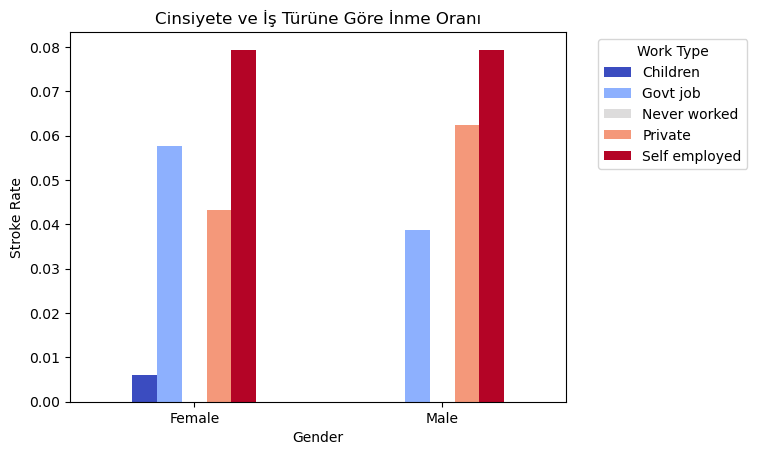

In [42]:
erkek_kadin_inme = df.groupby(['gender', 'work_type'])['stroke'].mean().unstack()

plt.figure(figsize=(8,6))
erkek_kadin_inme.plot(kind='bar',colormap='coolwarm')
plt.title('Cinsiyete ve İş Türüne Göre İnme Oranı')
plt.ylabel('Stroke Rate')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

analiz sonuçlarına göre kadın ve erkekler arasında stroke (inme) riski açısından belirgin bir fark görünmüyor. Hem genel stroke oranları hem de iş türüne göre cinsiyet kırılımında oranlar birbirine yakın çıkıyor. 

 According to the analysis results, there is no significant difference between women and men in terms of stroke risk. Both the overall stroke rates and the rates broken down by gender according to job type are similar. 

<div class="alert alert-block alert-success">

### <span style=" color:red"> How does the combination of risk factors amplify stroke likelihood?
</span>

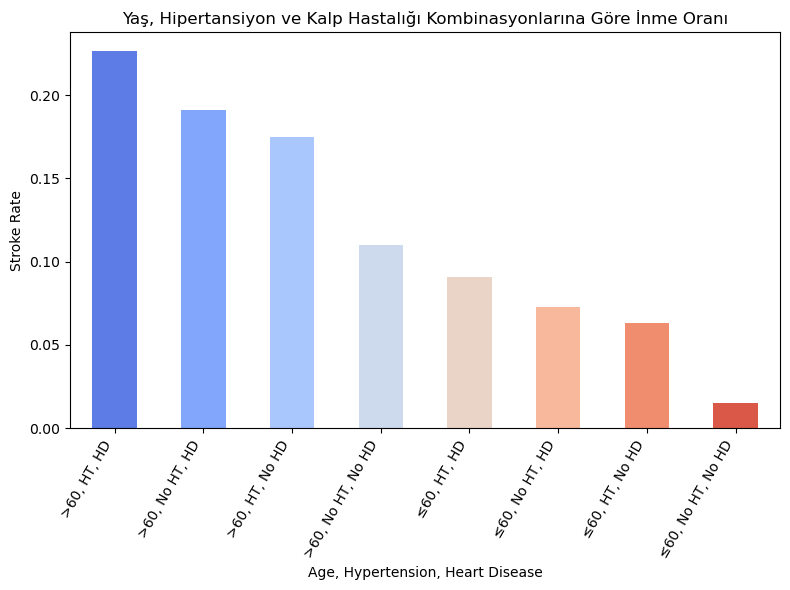

In [43]:
df['age_over_60'] = df['age'] > 60
df['risk_combo'] = df['age_over_60'].astype(str) + '_' + df['hypertension'].astype(str) + '_' + df['heart_disease'].astype(str)

combo_rates = df.groupby('risk_combo')['stroke'].mean()

combo_labels = {
    'False_0_0': '≤60, No HT, No HD',
    'False_0_1': '≤60, No HT, HD',
    'False_1_0': '≤60, HT, No HD',
    'False_1_1': '≤60, HT, HD',
    'True_0_0':  '>60, No HT, No HD',
    'True_0_1':  '>60, No HT, HD',
    'True_1_0':  '>60, HT, No HD',
    'True_1_1':  '>60, HT, HD'
}
combo_rates.index = combo_rates.index.map(combo_labels)

# Stroke oranına göre sıralama (çoktan aza)
combo_rates = combo_rates.sort_values(ascending=False)
colors = sns.color_palette('coolwarm', len(combo_rates))
plt.figure(figsize=(8,6))
combo_rates.plot(kind='bar', color=colors)  
plt.title('Yaş, Hipertansiyon ve Kalp Hastalığı Kombinasyonlarına Göre İnme Oranı')
plt.ylabel('Stroke Rate')
plt.xlabel('Age, Hypertension, Heart Disease')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()


Risk Faktörü Kombinasyonlarına Göre İnme Oranı tablosu ve grafiği, birden fazla risk faktörünün (örneğin yaş > 60, hipertansiyon, kalp hastalığı) aynı anda bulunmasının inme (stroke) riskini nasıl artırdığını gösterir.

Burada yapılan analizde:

Her bir birey için üç ana risk faktörü (yaş>60, hipertansiyon, kalp hastalığı) dikkate alınıyor.
Her kombinasyon için (örneğin: yaş>60 & hipertansiyon var & kalp hastalığı yok) stroke oranı hesaplanıyor.
Sonuçlar barplot ile görselleştiriliyor.

Özellikle yaşlı, hipertansiyonu ve kalp hastalığı olan bireylerde stroke oranı çok daha yüksek. Tersine, bu risk faktörlerinden hiçbiri olmayanlarda stroke oranı düşük.
Bu tablo ve grafik, risk faktörlerinin birlikte bulunmasının inme riskini çarpıcı biçimde artırdığını açıkça gösterir. 

The Stroke Rate Table and Graph by Risk Factor Combinations shows how the presence of multiple risk factors (e.g., age > 60, hypertension, heart disease) simultaneously increases the risk of stroke.

In this analysis:

Three main risk factors (age > 60, hypertension, heart disease) are considered for each individual.
The stroke rate is calculated for each combination (e.g., age > 60 & hypertension present & no heart disease).
The results are visualized using bar plots.

The stroke rate is significantly higher in older individuals with hypertension and heart disease. Conversely, the stroke rate is low in those without any of these risk factors.
This table and graph clearly show that the coexistence of risk factors dramatically increases the risk of stroke. 

<div class="alert alert-block alert-success">

### <span style=" color:red"> What patterns emerge when analyzing age and lifestyle factors together?
</span>

How does stroke probability change as more risk factors overlap (e.g., age > 60, smoking, and heart disease)?

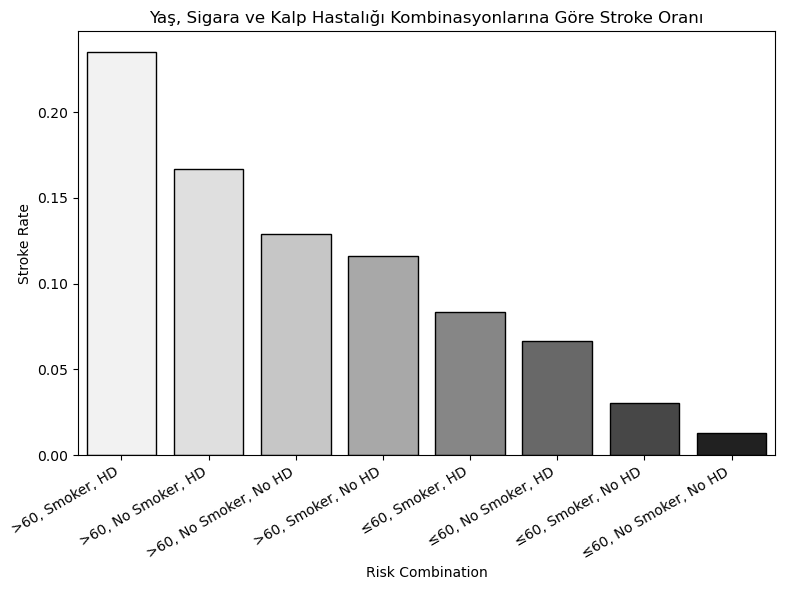

In [44]:
# Yaş (>60), sigara kullanımı ve kalp hastalığı kombinasyonlarına göre stroke oranı
# Gerekli sütunları oluştur
df['age_over_60'] = df['age'] > 60
df['smoker'] = df['smoking_status'].isin(['Smokes', 'Formerly smoked'])

# Kombinasyon sütunu
df['risk_combo'] = (
    df['age_over_60'].astype(int).astype(str) + '_' +
    df['smoker'].astype(int).astype(str) + '_' +
    df['heart_disease'].astype(int).astype(str)
)

# Stroke oranı hesapla
combo_stroke = df.groupby('risk_combo')['stroke'].mean().reset_index()

# Açıklayıcı etiketler
combo_labels = {
    '0_0_0': '≤60, No Smoker, No HD',
    '0_0_1': '≤60, No Smoker, HD',
    '0_1_0': '≤60, Smoker, No HD',
    '0_1_1': '≤60, Smoker, HD',
    '1_0_0': '>60, No Smoker, No HD',
    '1_0_1': '>60, No Smoker, HD',
    '1_1_0': '>60, Smoker, No HD',
    '1_1_1': '>60, Smoker, HD'
}
combo_stroke['label'] = combo_stroke['risk_combo'].map(combo_labels)

# Stroke oranına göre azalan sırala
combo_stroke = combo_stroke.sort_values('stroke', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='label', y='stroke', data=combo_stroke, palette='Grays', edgecolor='black')
plt.title('Yaş, Sigara ve Kalp Hastalığı Kombinasyonlarına Göre Stroke Oranı')
plt.xlabel('Risk Combination')
plt.ylabel('Stroke Rate')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

- Sadece yaşlılık veya sadece sigara kullanımı stroke riskini artırmakla birlikte, bu faktörler bir araya geldiğinde stroke oranı çok daha belirgin şekilde yükselmektedir.
- Özellikle **yaşlı (60 yaş üstü), kalp hastalığı olan ve sigara kullanan bireylerde** stroke oranı artmaktadır.
- Tersine, bu üç risk faktöründen hiçbirine sahip olmayanlarda stroke oranı oldukça düşüktür.
**Sonuç:**  
Yaş,kalp hastalığı gibi sağlık faktörleri ile sigara gibi yaşam tarzı bir araya geldiğinde stroke riski artmaktadır. Bu durum, çoklu risk faktörlerinin birlikte yönetilmesinin ve önleyici sağlık politikalarının önemini vurgulamaktadır.

- While old age or smoking alone increases the risk of stroke, when these factors are combined, the stroke rate rises significantly.
- The stroke rate increases particularly in individuals who are **elderly (over 60), have heart disease, and smoke**.
- Conversely, the stroke rate is quite low in those who do not have any of these three risk factors.
**Conclusion:**  
When health factors such as age and heart disease are combined with lifestyle factors such as smoking, the risk of stroke increases. This situation highlights the importance of managing multiple risk factors together and implementing preventive health policies.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Does marital status (ever_married) correlate with stroke likelihood?
</span>

ever_married
No     0.016515
Yes    0.065613
Name: stroke, dtype: float64


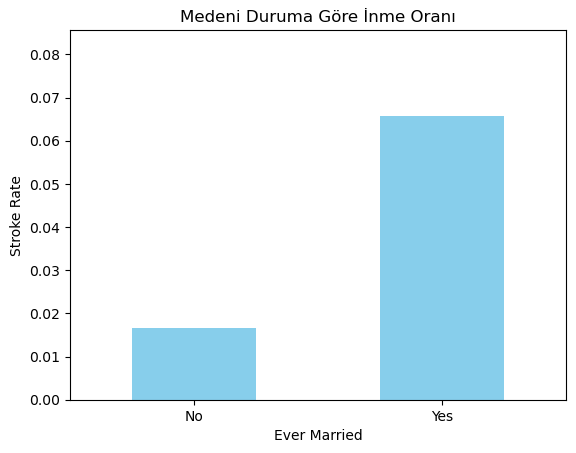

In [45]:
inme_orani_medenidurum = df.groupby('ever_married')['stroke'].mean()

print(inme_orani_medenidurum)

inme_orani_medenidurum.plot(kind='bar', color='skyblue')
plt.title('Medeni Duruma Göre İnme Oranı')
plt.ylabel('Stroke Rate')
plt.xlabel('Ever Married')
plt.xticks(rotation=0)
plt.ylim(0, inme_orani_medenidurum.max() + 0.02)  # Y eksenini biraz boşluklu yap
plt.show()


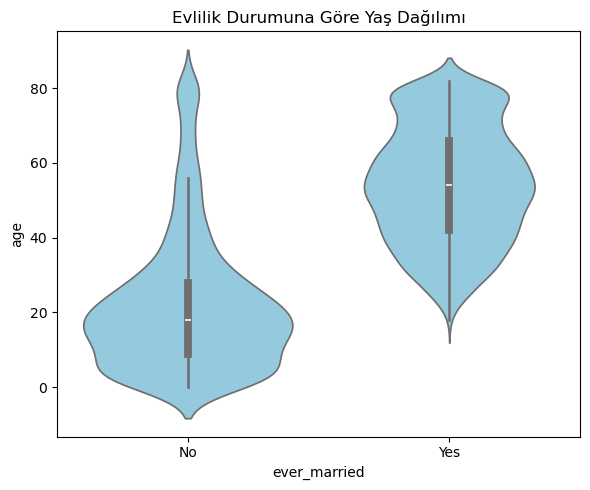

In [46]:
plt.figure(figsize=(6,5))
sns.violinplot(x='ever_married', y='age', data=df, color='skyblue')
plt.title('Evlilik Durumuna Göre Yaş Dağılımı')
plt.tight_layout()

Evli bireylerde stroke oranının yüksek çıkmasının asıl sebebi evli grubun yaşça daha büyük olması gibi gözüküyor. Evlilik durumu yaş ile ilişkili olarak dolaylı bir etki göstermektedir.

The main reason for the high incidence of stroke among married individuals appears to be that the married group is older. Marital status has an indirect effect related to age.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Are there regional trends in stroke occurrence (Urban vs Rural)?
</span>

residence_type
Rural    0.045364
Urban    0.052003
Name: stroke, dtype: float64


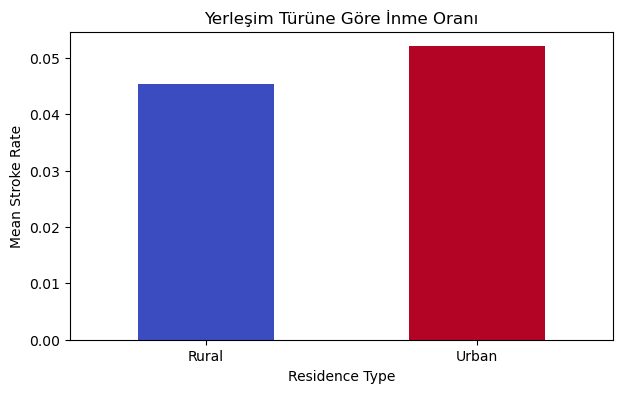

In [47]:
inme_orani_konut = df.groupby('residence_type')['stroke'].mean()

print(inme_orani_konut)

labels = ['Rural', 'Urban']
colors = ['#3B4CC0', '#B40426'] 

plt.figure(figsize=(7,4))
inme_orani_konut.index = labels
inme_orani_konut.plot(kind='bar', color=colors)
plt.title('Yerleşim Türüne Göre İnme Oranı')
plt.ylabel('Mean Stroke Rate')
plt.xlabel('Residence Type')
plt.xticks(rotation=0)
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> How are continuous variables related to categorical variables?
</span>

In [48]:
categorical_vars = ['gender', 'ever_married', 'work_type', 'residence_type']

for cat in categorical_vars:
    print(f"\n{cat} kategorisine göre AGE (count, mean, median):")
    age_stats = df.groupby(cat)['age'].agg(['count', 'mean', 'median'])
    print(age_stats)


gender kategorisine göre AGE (count, mean, median):
        count       mean  median
gender                          
Female   2994  43.756179    44.0
Male     2115  42.485106    46.0

ever_married kategorisine göre AGE (count, mean, median):
              count       mean  median
ever_married                          
No             1756  22.011959    18.0
Yes            3353  54.342082    54.0

work_type kategorisine göre AGE (count, mean, median):
               count       mean  median
work_type                              
Children         687   6.841339     6.0
Govt job         657  50.879756    51.0
Never worked      22  16.181818    16.0
Private         2924  45.510602    45.0
Self employed    819  60.201465    63.0

residence_type kategorisine göre AGE (count, mean, median):
                count       mean  median
residence_type                          
Rural            2513  42.906884    44.0
Urban            2596  43.542758    45.0


In [49]:
categorical_vars = ['smoking_status', 'stroke', 'heart_disease', 'hypertension']

for cat in categorical_vars:
    print(f"\n{cat} kategorisine göre AGE (count, mean, median):")
    age_stats = df.groupby(cat)['age'].agg(['count', 'mean', 'median'])
    print(age_stats)


smoking_status kategorisine göre AGE (count, mean, median):
                 count       mean  median
smoking_status                           
Formerly smoked    884  54.962670    57.0
Never smoked      1892  46.744715    47.0
Smokes             789  47.096324    47.0
Unknown           1544  30.229922    23.0

stroke kategorisine göre AGE (count, mean, median):
        count       mean  median
stroke                          
0        4860  41.974897    43.0
1         249  67.726908    71.0

heart_disease kategorisine göre AGE (count, mean, median):
               count       mean  median
heart_disease                          
0               4833  41.804676    43.0
1                276  68.188406    71.0

hypertension kategorisine göre AGE (count, mean, median):
              count       mean  median
hypertension                          
0              4611  41.176318    42.0
1               498  62.244980    63.0


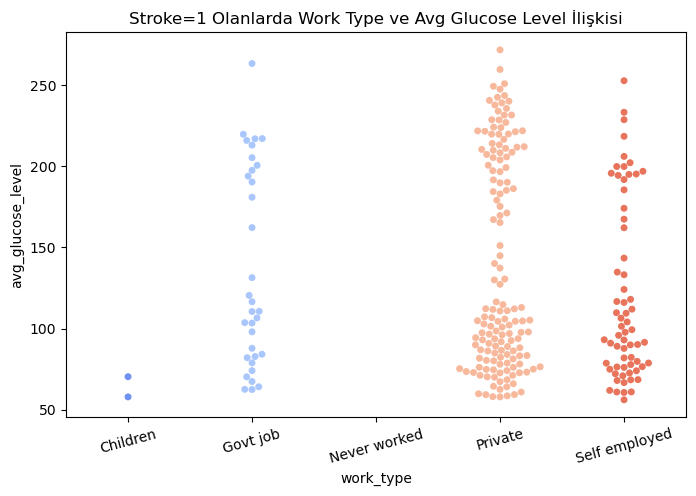

In [50]:
# stroke=1 olan kayıtları filtrele
df_stroke_1 = df[df['stroke'] == 1]
plt.figure(figsize=(8,5))
sns.swarmplot(x='work_type', y='avg_glucose_level', data=df_stroke_1, palette='coolwarm')
plt.title('Stroke=1 Olanlarda Work Type ve Avg Glucose Level İlişkisi')
plt.xticks(rotation=15)
plt.show()

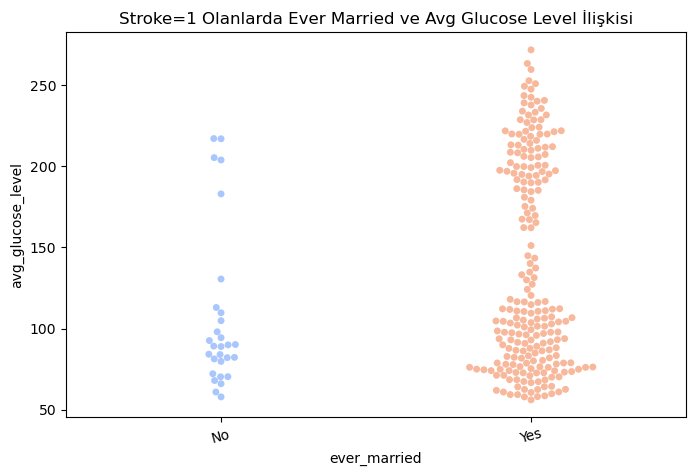

In [51]:
plt.figure(figsize=(8,5))
sns.swarmplot(x='ever_married', y='avg_glucose_level', data=df_stroke_1, palette='coolwarm')
plt.title('Stroke=1 Olanlarda Ever Married ve Avg Glucose Level İlişkisi')
plt.xticks(rotation=15)
plt.show()

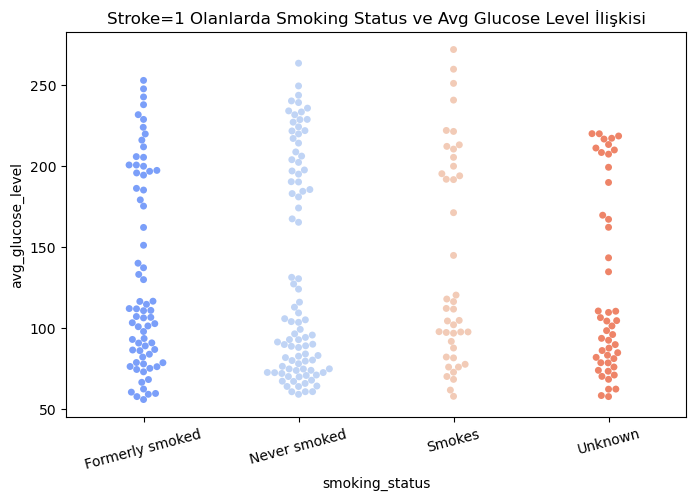

In [52]:
plt.figure(figsize=(8,5))
sns.swarmplot(x='smoking_status', y='avg_glucose_level', data=df_stroke_1 , palette='coolwarm')
plt.title('Stroke=1 Olanlarda Smoking Status ve Avg Glucose Level İlişkisi')
plt.xticks(rotation=15)
plt.show()

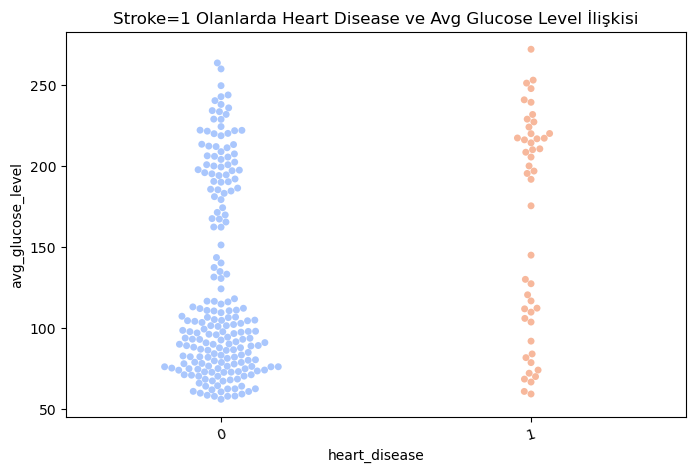

In [53]:
plt.figure(figsize=(8,5))
sns.swarmplot(x='heart_disease', y='avg_glucose_level', data=df_stroke_1, palette='coolwarm')
plt.title('Stroke=1 Olanlarda Heart Disease ve Avg Glucose Level İlişkisi')
plt.xticks(rotation=15)
plt.show()

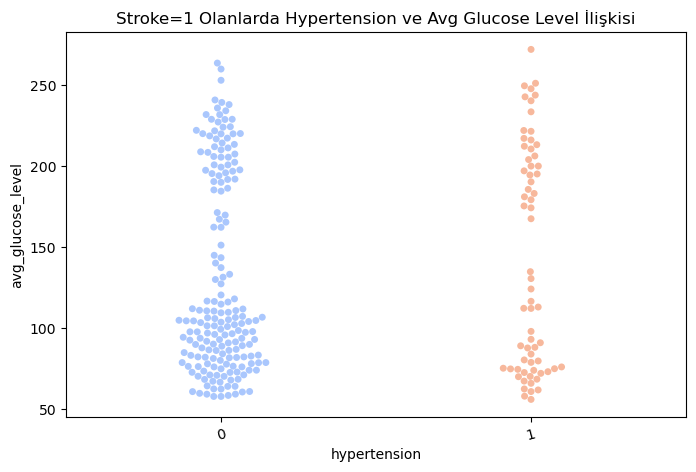

In [54]:
plt.figure(figsize=(8,5))
sns.swarmplot(x='hypertension', y='avg_glucose_level', data=df_stroke_1, palette='coolwarm')
plt.title('Stroke=1 Olanlarda Hypertension ve Avg Glucose Level İlişkisi')
plt.xticks(rotation=15)
plt.show()

<div class="alert alert-info alert-warning ">

# <span style=" color:red">Conclusions
</span>

Projemizdeki analizlere göre inme (stroke) riski üzerinde en etkili olan yaş, kalp hastalığı, hipertansiyon, sigara içme durumu, iş türü ve evlilik durumunun etkileri şöyle özetlenebilir:

Yaş:
Analizlerimizde yaş arttıkça stroke oranının belirgin şekilde yükseldiği, özellikle 60 yaş üstü gruplarda riskin çok daha yüksek olduğu görülüyor.


Kalp Hastalığı:
Kalp hastalığı olan bireylerde stroke oranı anlamlı şekilde daha yüksek çıkıyor.

Hipertansiyon:
Hipertansiyonu olanlarda stroke riski anlamlı şekilde artıyor.

Sigara içme:
Sigara içenlerde stroke riski artıyor.

İş Türü:
İş türü doğrudan stroke riskini belirgin şekilde etkilemiyor; ancak iş türü hipertansiyon riskini tetikleyerek dolaylı yoldan stroke riskine katkı sağlıyor.

Evlilik Durumu:
Evli olanlarda yaş ortalaması daha yüksek olduğu için stroke riski artıyor.

Sonuç:
Yaş, kalp hastalığı, hipertansiyon, sigara  doğrudan, glukoz ve bmi ise birlikte stroke riskini en çok etkileyen faktörler gibi görünüyor. İş türü ise hipertansiyon üzerinden dolaylı bir etki gösteriyor.

According to our project's analyses, the effects of age, heart disease, hypertension, smoking status, job type, and marital status on stroke risk can be summarized as follows:

Age:
Our analyses show that the stroke rate increases significantly with age, with the risk being much higher in groups over 60 years old.


Heart Disease:
The stroke rate is significantly higher in individuals with heart disease.

Hypertension:
The risk of stroke increases significantly in people with hypertension.

Smoking:
The risk of stroke increases in smokers.

Type of Work:
The type of work does not directly affect stroke risk; however, it contributes to stroke risk indirectly by triggering hypertension risk.

Marital Status:
The risk of stroke increases in married individuals because their average age is higher.

Conclusion:
Age, heart disease, hypertension, and smoking appear to be the factors that most directly affect stroke risk, while glucose and BMI appear to be the factors that most affect stroke risk collectively. Job type has an indirect effect through hypertension.